In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-01-26 17:25:24.303314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Paths to data directories
train_dir = "DATASET/TRAIN"
test_dir = "DATASET/TEST"

In [3]:
# Image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,   # Normalize pixel values
    rotation_range=20,   # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'      # Binary classification (R or O)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

/Users/bixentesehabiague/anaconda3/envs/monenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.7668 - loss: 0.5149

/Users/bixentesehabiague/anaconda3/envs/monenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 440s 621ms/step - accuracy: 0.7668 - loss: 0.5148 - val_accuracy: 0.8878 - val_loss: 0.3049
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 441s 625ms/step - accuracy: 0.8327 - loss: 0.3945 - val_accuracy: 0.8528 - val_loss: 0.3488
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 439s 621ms/step - accuracy: 0.8468 - loss: 0.3729 - val_accuracy: 0.8910 - val_loss: 0.2874
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 419s 593ms/step - accuracy: 0.8524 - loss: 0.3623 - val_accuracy: 0.8961 - val_loss: 0.2715
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 426s 603ms/step - accuracy: 0.8606 - loss: 0.3470 - val_accuracy: 0.8981 - val_loss: 0.2602
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 423s 598ms/step - accuracy: 0.8659 - loss: 0.3369 - val_accuracy: 0.8850 - val_loss: 0.3174
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 413s 584ms/step - accuracy: 0.8670 - loss: 0.3308 - val_accuracy: 0.8806 - val_loss: 0.3012
Epoch 8/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 431s 611ms/step - accuracy: 0.8674 - loss: 0.32

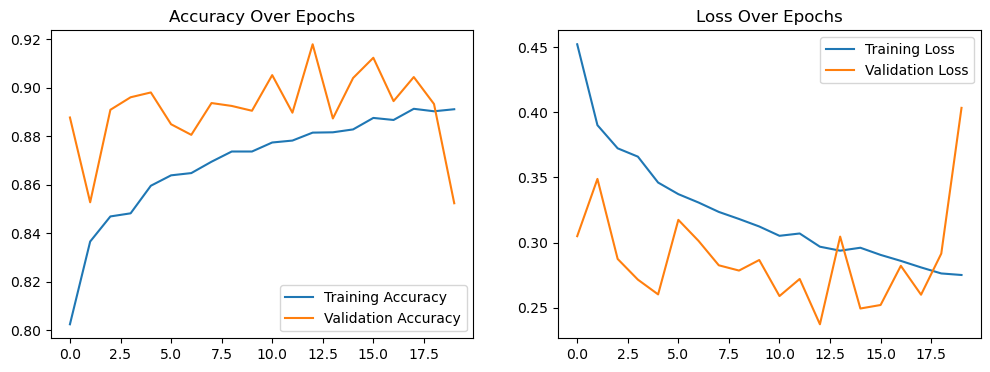

In [55]:
# Visualize performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')

plt.show()

In [57]:
# Final evaluation on test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.8555 - loss: 0.3940
Test Accuracy: 0.85


In [61]:
# Save the model
model.save("waste_classification_model.keras")
print("Model saved as 'waste_classification_model.keras'.")

Modèle sauvegardé sous le nom 'waste_classification_model.keras'.
